# Bank Customer Churn Prediction
In the following we want to go toward another dataset and do the same tasks we did in our previous [project](https://www.kaggle.com/code/alishohadaee/dl-customer-churn-prediction). The following will be only a practice exercise of what we have learned until now. 

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
# Dataset path: "/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv"

bank = pd.read_csv("/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv", index_col="RowNumber")
bank.head()
# bank.sample(5)  # This line returns 5 samples of dataset

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bank.shape

(10000, 13)

## Preprocessing
In the following we will go through the data and modify them if necessary. 

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
bank.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

According to output we have 13 columns (features). Some of these columns are useless in calculating the output. For example, the surname of an individual must affect the output the will be produced, because it is not related to whether a person leaves the bank or not.

Hence, we drop this column.

In [6]:
bank.drop(["CustomerId", "Surname"], axis=1, inplace=True)
bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

- Note: `inplace=True` ensures that the operation modifies the DataFrame directly without returning a new DataFrame.

As you must already know, NN needs numerical values, so we should handle the `Geography` and `Gender` columns as their types are object. Let's first deal with Gender. 

In [7]:
bank.Gender.unique()

array(['Female', 'Male'], dtype=object)

So, in this dataset, our `Gender` column has only two unique values, we can easily convert it to a binary column. Hence, we have: 

In [8]:
bank.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)
print("The new values for Gender column are: ", bank.Gender.unique())
bank.dtypes

The new values for Gender column are:  [0 1]


/tmp/ipykernel_18/3121149053.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True)


CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Now let's deal with the Geography column. Let's see the unique values of this column and then choose a method to deal with it. 

In [9]:
bank.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

So, we have only three different values for this column. Two of the methods of converting this column to a numerical value are:

1. **Label Encoding**: Assign each country a unique numerical label. This is useful if there is an inherent order to the countries, which may not be the case for countries, but could be applicable in other contexts.

```python
from sklearn.preprocessing import LabelEncoder

# Create a sample DataFrame
data = {
    'Country': ['USA', 'Canada', 'USA', 'Mexico', 'Canada']
}

df = pd.DataFrame(data)

# Use LabelEncoder to convert countries to numerical labels
label_encoder = LabelEncoder()
df['Country_Label'] = label_encoder.fit_transform(df['Country'])

print(df)
```

2. **One-Hot Encoding**: Create binary columns for each country, indicating whether or not each row corresponds to that country. This is a common technique for dealing with categorical variables.

```python
# Use pandas get_dummies to perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['Country'], prefix='Country')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

print(df)
```

In our practice, we want to solve this by the `OneHotEncodding` technique. Follow the cells:

In [10]:
one_hot_encoded = pd.get_dummies(bank['Geography'], prefix='Geo')
bank = pd.concat([bank, one_hot_encoded], axis=1).drop(['Geography'], axis=1)
bank.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Geo_France            bool
Geo_Germany           bool
Geo_Spain             bool
dtype: object

In [11]:
bank.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
6606,771,0,33,5,0.00,2,1,0,8673.43,0,False,False,True
9609,700,1,44,9,0.00,2,1,0,142287.65,0,False,False,True
6562,445,0,48,7,168286.58,1,1,0,16645.77,1,False,True,False
687,715,0,31,2,112212.14,2,1,1,181600.72,0,True,False,False
9384,716,0,23,2,94464.81,2,0,1,185900.88,0,True,False,False


Let's convert the boolean values of these three columns to integers:

In [12]:
bank['Geo_France'] = bank['Geo_France'] * 1
bank['Geo_Germany'] = bank['Geo_Germany'] * 1
bank['Geo_Spain'] = bank['Geo_Spain'] * 1
bank.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
2736,551,0,30,2,143340.44,1,1,0,145796.49,0,0,1,0
3772,477,1,34,8,139959.55,2,1,1,189875.83,0,0,1,0
3021,571,0,38,6,107193.82,2,0,0,38962.94,0,1,0,0
8850,664,0,38,4,74306.19,2,1,0,154395.56,0,1,0,0
4400,670,0,45,9,104930.38,1,1,0,155921.81,1,1,0,0


Now, We need to normalize the columns with different ranges into a same range. This improves the accuracy of the our model. 

In [13]:
for col in bank.columns:
    print(f'{col}: {bank[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
bank[scale_col] = scaler.fit_transform(bank[scale_col])

for col in bank.columns:
    print(f'{col}: {bank[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [15]:
bank.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Model and Training
In the following we want to split the data and train a NN model. 

### Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

X = bank.drop('Exited', axis=1)
y = bank['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [17]:
X_train.sample(6)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
639,0.788,0,0.337838,1.0,0.589212,0.000000,0,1,0.121124,1,0,0
9186,0.468,1,0.229730,0.6,0.644142,0.333333,1,1,0.741204,1,0,0
9845,0.616,0,0.297297,0.5,0.572209,0.000000,1,1,0.948071,1,0,0
7678,0.690,1,0.243243,0.4,0.643819,0.000000,1,0,0.504695,1,0,0
4659,0.700,1,0.135135,0.8,0.637312,0.000000,0,0,0.113446,0,0,1
9727,0.846,1,0.337838,0.7,0.550624,0.000000,1,1,0.886813,0,0,1


### Building ANN Model

In [18]:
import tensorflow as tf
from tensorflow import keras 

model = keras.Sequential([
    keras.Input(shape=(12, )),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

2024-04-21 08:55:46.681646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 08:55:46.681783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 08:55:46.913222: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7165 - loss: 0.5682
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.4678
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8007 - loss: 0.4543
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8116 - loss: 0.4363
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8180 - loss: 0.4259
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4299
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8138 - loss: 0.4207
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8170 - loss: 0.4261
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8217 - loss: 0.4183
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4104
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.4116
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Evaluation of the model

In the following we will evaluate our model on different metrics. 

In [19]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8203 - loss: 0.4263


[0.4208577871322632, 0.8255000114440918]

In [20]:
y_p = model.predict(X_test)
y_p

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.09673698],
       [0.08441187],
       [0.23283644],
       ...,
       [0.04704943],
       [0.11411659],
       [0.44637588]], dtype=float32)

Now, let's convert the y_p to actual meaningful output. Since, this is a binary classification problem, a threshold can easily help us. We consider 0.5 as our threshold here. 

In [21]:
y_pred = []
for prediction in y_p:
    if prediction > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_pred[:10], '\n', list(y_test[:10]))

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0] 
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0]


Let's calculate some metrics:

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1593
           1       0.65      0.32      0.43       407

    accuracy                           0.83      2000
   macro avg       0.75      0.64      0.66      2000
weighted avg       0.80      0.83      0.80      2000



Let's see the confusion matrix

Text(95.72222222222221, 0.5, 'Actual ')

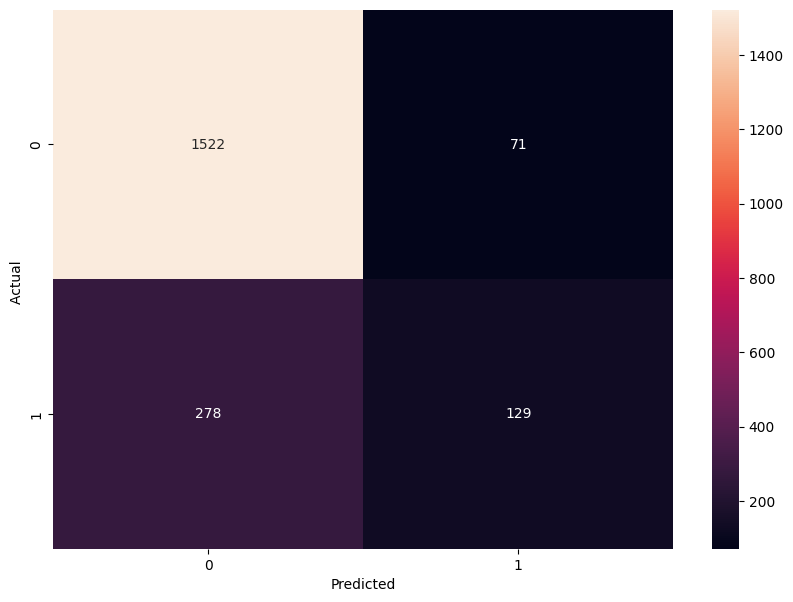

In [23]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual ')

and now, as practice, let's compute the previous metrics ourself with the help of this matrix:

In [24]:
#### Accuracy ####
print("Accuracy = ", round((1546 + 136) / (1546 + 47 + 271 + 136), 2))

#### Precision for class 0 ####
print("Precision for class 0 = ", round(1546 / (1546 + 271), 2))

#### Precision for class 1 ####
print("Precision for class 1 = ", round(136 / (136 + 47), 2))

#### Recall for class 0 ####
print("Recall for class 0 = ", round(1546 / (1546 + 47), 2))

#### Recall for class 1 ####
print("Recall for class 1 = ", round(136 / (136 + 271), 2))


Accuracy =  0.84
Precision for class 0 =  0.85
Precision for class 1 =  0.74
Recall for class 0 =  0.97
Recall for class 1 =  0.33
